In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import plotly.express as px #for plotting the scatter plot
import seaborn as sns #for plotting dataset in seaborn
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
df=df.drop(['Id'],axis=1)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
#check for empty cells
for column in df:
  print("Number of empty cells in {} is {}".format(column,(df[column]=="").sum()))

Number of empty cells in SepalLengthCm is 0
Number of empty cells in SepalWidthCm is 0
Number of empty cells in PetalLengthCm is 0
Number of empty cells in PetalWidthCm is 0
Number of empty cells in Species is 0


In [7]:
#find zero values
for column in df:
  print(("Number of zeros in {} is {}".format(column,(df[column]==0).sum())))

Number of zeros in SepalLengthCm is 0
Number of zeros in SepalWidthCm is 0
Number of zeros in PetalLengthCm is 0
Number of zeros in PetalWidthCm is 0
Number of zeros in Species is 0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
labelEncoder=LabelEncoder()

In [10]:
df["state"]=labelEncoder.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,state
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [12]:
y=df["state"]
x=df.drop(["state","Species"],axis=1)

In [13]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [14]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = model.predict(x_test)

In [16]:
y_pred

array([2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 0, 2, 0, 0, 1])

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [18]:
ValuePredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Create a dataframe to display actual and Predicted value
ValuePredict

,Actual,Predicted
109,2,2
138,2,2
125,2,2
31,0,0
17,0,0
40,0,0
97,1,1
19,0,0
20,0,0
71,1,1


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
ConfusionMatrix=confusion_matrix(y_test,y_pred)
print(ConfusionMatrix) 

[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]


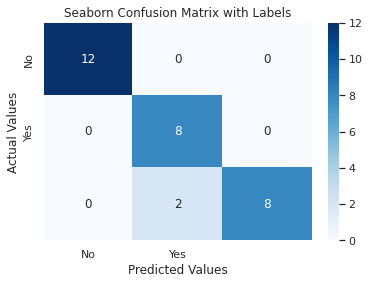

In [21]:
ax=sns.heatmap(ConfusionMatrix,annot=True,cmap="Blues")

ax.set_title('Seaborn Confusion Matrix with Labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

#ticket labels - Must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

#Display
plt.show()